# Our movie review classifier

In [35]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

In [20]:
%matplotlib inline

In [2]:
data_dir = os.path.join("data", "train")

In [3]:
data_dir

'data\\train'

In [5]:
file_names = os.listdir(data_dir)

In [6]:
len(file_names)

10000

In [7]:
file_names[0]

'reviews0.txt'

In [12]:
documents, labels = [], []
for file_name in file_names:
    with open(os.path.join(data_dir, file_name), encoding='utf8') as f:
        labels.append(int(next(f)))
        documents.append(f.read())

In [13]:
len(documents)

10000

In [14]:
len(labels)

10000

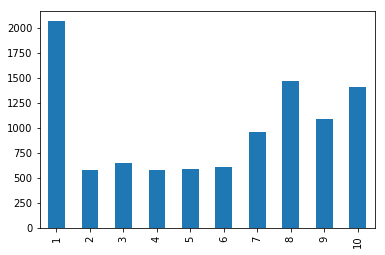

In [25]:
pd.Series(labels).value_counts().sort_index().plot.bar()

In [26]:
labels_binary = [1 if x >= 7 else 0 for x in labels]

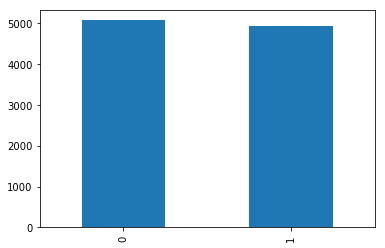

In [27]:
pd.Series(labels_binary).value_counts().sort_index().plot.bar()

# Create a classifier

In [30]:
splitter = StratifiedShuffleSplit(n_splits)

In [32]:
train_index, test_index = next(StratifiedShuffleSplit().split(documents, labels_binary))
    

In [33]:
len(train_index)

9000

In [34]:
len(test_index)

1000

In [36]:
documents = pd.Series(documents)
labels_binary = pd.Series(labels_binary)

In [45]:
documents_train = documents.iloc[train_index]
documents_test = documents.iloc[test_index]
labels_train = labels_binary.iloc[train_index]
labels_test = labels_binary.iloc[test_index]

In [46]:
vec = CountVectorizer()

In [61]:
X_train = vec.fit_transform(documents_train)

In [60]:
clf = LogisticRegression()

In [62]:
clf.fit(X_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
X_test = vec.transform(documents_test)

In [66]:
labels_pred = clf.predict(X_test)

In [68]:
np.average(labels_test.values == labels_pred)

0.86899999999999999

In [78]:
i = 1

In [79]:
labels_pred[i]

1

In [80]:
labels_test.iloc[i]

1

In [81]:
print(documents_test.iloc[i])

Capitalist adventure movie

Essentially, 'Gold' is an old fashioned adventure movie. A hostile
environment, changing fortunes, shifting alliances, unexpected
adversaries, a seemingly betrayed friendship: it's all there. But the
setting is out of the ordinary: it's the financial world with millions
of dollars pumped into promising mining stocks. But those millions can
just as quickly be withdrawn when the prospects change.The adventurer in the midst of it all is Kenny Wells, son of a Nevada
gold prospector and heir to an almost bankrupt mining company. In an
all-or-nothing attempt, he travels to Indonesia for a meeting with a
legendary drilling expert. The next step is to find the money required
for the drilling. What follows, is a roller-coaster ride of successes
and setbacks.Matthew McConaughey is amazing as Kenny Wells, a raving maniac with a
fearless can-do mentality and a complete lack of respect for Wall
Street hotshots or mining moguls. This is one of his best roles ever,
and it'

In [82]:
new_review = """
Tied for the best movie I have ever seen

Why do I want to write the 234th comment on The Shawshank Redemption? I am not sure - almost everything that could be possibly said about it has been said. But like so many other people who wrote comments, I was and am profoundly moved by this simple and eloquent depiction of hope and friendship and redemption. 

The only other movie I have ever seen that effects me as strongly is To Kill a Mockingbird. Both movies leave me feeling cleaner for having watched them.

I didn't intend to see this movie at all: I do not like prison movies and I don't normally watch them. I work at a branch library and one day as I was checking The Shawshank Redemption out to one of our older patrons, she said to me, "Whenever I feel down or depressed, I check out this movie and watch it and it always makes me feel better." At the time, I thought that was very strange. One day there was nothing on TV except things I absolutely would not watch under any circumstance or things that I had seen too many times already. I remembered what she said, so I watched it. I have watched it many many times since then and it gets better with every showing.

No action, no special effects - just men in prison uniforms talking to each other.

The Shawshank Redemption and To Kill a Mockingbird are the best movies I have ever seen. I do not judge it by it's technical merits - I don't really care about that. I have read that Citizen Kane or The Godfather or this or that movie is the best movie ever made. They may have the best technique or be the most influential motion pictures ever made, but not the best. The best movies are ones that touch the soul. It takes a movie like The Shawshank Redemption to touch the soul.
"""

In [85]:
X_new_review = vec.transform([new_review])

In [88]:
clf.predict(X_new_review)[0]

1